<a href="https://colab.research.google.com/github/osadose/osadose/blob/main/Heart_Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-29ae08213eca>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



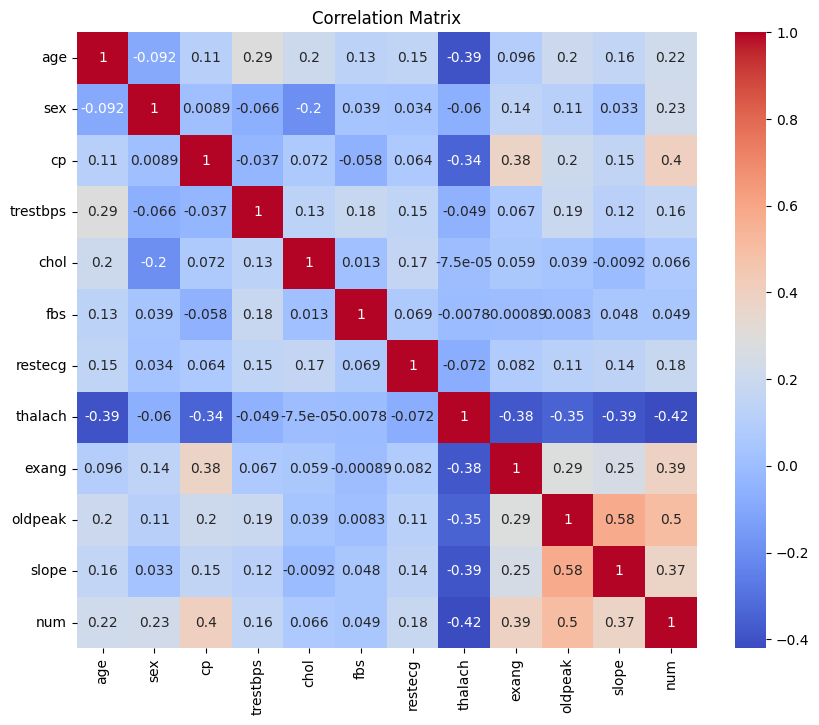

In [7]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv(url, names=column_names)

# Preprocessing: Replace '?' with NaN and drop rows with missing values
df.replace("?", float("NaN"), inplace=True)
df.dropna(inplace=True)

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0) # Any value > 0 means heart disease

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Data Exploration
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Model Selection
# Try Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Measure accuracy of the model
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

# Evaluate model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
